In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/uciml/iris/versions/2


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import os

df = pd.read_csv(os.path.join(path, "Iris.csv"))

In [31]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
from ydata_profiling import ProfileReport  # Pandas profiling has been depreicated

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [34]:
df = df.drop(["Id"], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
profile = ProfileReport(df, title="Iris Dataset Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

In [38]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)
species_mappings = {index: label for index, label in enumerate(encoder.classes_)}

species_mappings

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [39]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
pd.DataFrame(X).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [43]:
from pycaret.classification import *

setup(data=X_train, target=y_train, session_id=42)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(105, 5)"
4,Transformed data shape,"(105, 5)"
5,Transformed train set shape,"(73, 5)"
6,Transformed test set shape,"(32, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [44]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9875,0.0000,0.9875,0.9906,0.9871,0.9810,0.9830,0.0030
ada,Ada Boost Classifier,0.9857,0.0000,0.9857,0.9905,0.9857,0.9788,0.9812,0.0120
lda,Linear Discriminant Analysis,0.9857,0.0000,0.9857,0.9893,0.9844,0.9774,0.9802,0.0040
dt,Decision Tree Classifier,0.9732,0.9800,0.9732,0.9811,0.9729,0.9597,0.9642,0.0040
rf,Random Forest Classifier,0.9732,1.0000,0.9732,0.9811,0.9729,0.9597,0.9642,0.0220
catboost,CatBoost Classifier,0.9589,1.0000,0.9589,0.9704,0.9572,0.9372,0.9444,0.0870
et,Extra Trees Classifier,0.9464,1.0000,0.9464,0.9610,0.9444,0.9181,0.9273,0.0160
gbc,Gradient Boosting Classifier,0.9446,0.0000,0.9446,0.9668,0.9419,0.9186,0.9310,0.0150
xgboost,Extreme Gradient Boosting,0.9339,0.9925,0.9339,0.9539,0.9295,0.9013,0.9130,0.0080
lr,Logistic Regression,0.9304,0.0000,0.9304,0.9466,0.9277,0.8934,0.9025,0.2460


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [45]:
inputs = Input(shape=(4,))
x = Dense(16, activation="relu")(inputs)
outputs = Dense(3, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

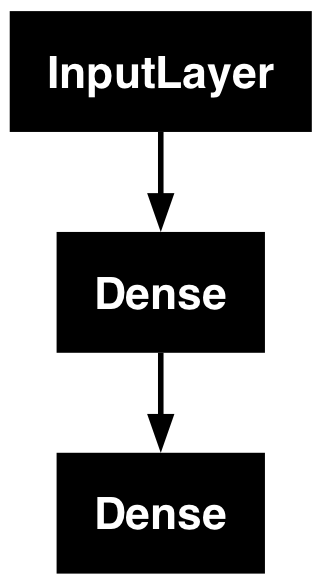

In [46]:
model.summary()
tf.keras.utils.plot_model(model)

In [47]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [48]:
batch_size = 32
epochs = 400

history = model.fit(
    X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs
)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4031 - loss: 1.0578 - val_accuracy: 0.3333 - val_loss: 1.0720
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4055 - loss: 1.0591 - val_accuracy: 0.3333 - val_loss: 1.0526
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4803 - loss: 1.0335 - val_accuracy: 0.3810 - val_loss: 1.0334
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5392 - loss: 0.9977 - val_accuracy: 0.4286 - val_loss: 1.0146
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6177 - loss: 0.9560 - val_accuracy: 0.4762 - val_loss: 0.9963
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6042 - loss: 0.9596 - val_accuracy: 0.5714 - val_loss: 0.9787
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5967 - loss: 0.9458 - val_accuracy: 0.5714 - val_loss: 0.9615
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6319 - loss: 0.9026 - val_accuracy: 0.5714 - val_loss: 0.9448

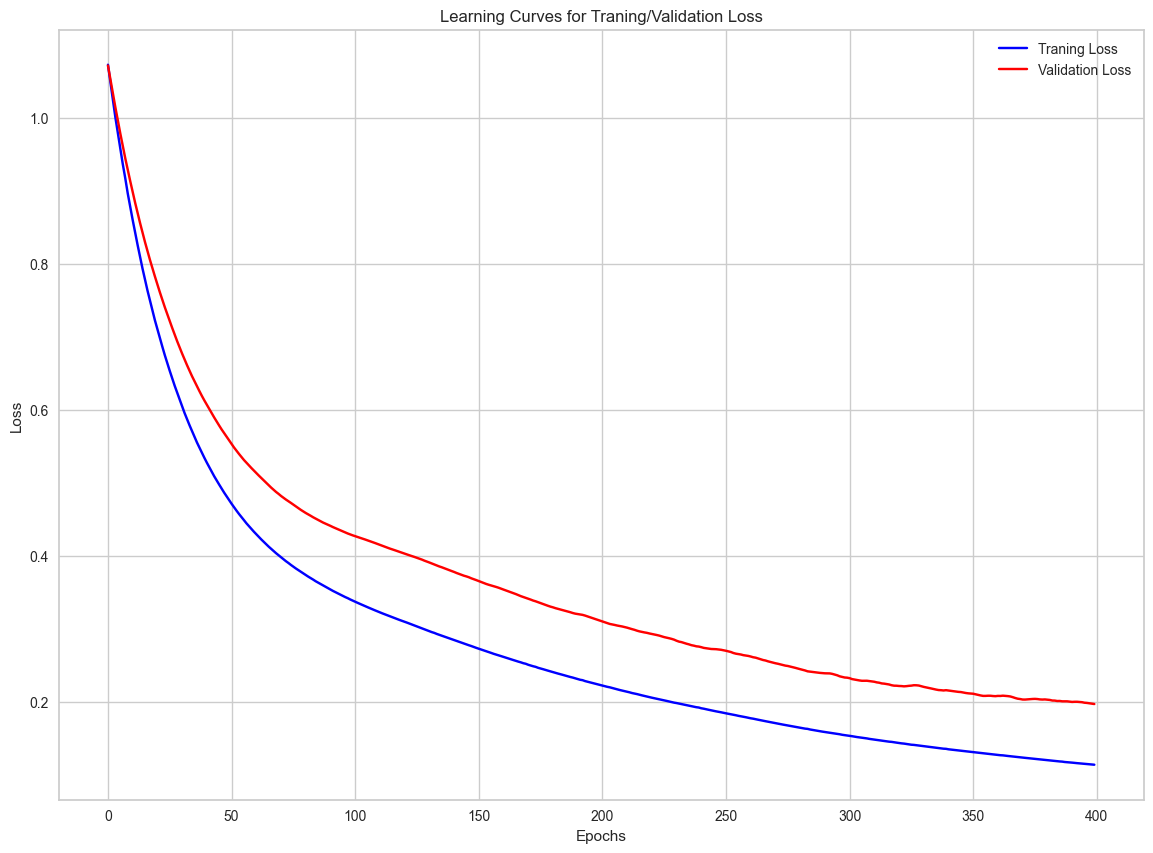

In [49]:
plt.figure(figsize=(14, 10))
plt.plot(range(epochs), history.history["loss"], color="blue")
plt.plot(range(epochs), history.history["val_loss"], color="red")
plt.title("Learning Curves for Traning/Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Traning Loss", "Validation Loss"])
plt.show()

In [50]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.0796 


[0.0787055492401123, 0.9777777791023254]

In [51]:
len(y_test)

45